In [5]:
import cv2
import numpy as np
from tensorflow import keras
import joblib
 
# Replace 'your_actual_path_here' with the actual path to your ensemble model file
ensemble_model_path = 'C:/Users/mohiu/OneDrive/Python/ensemble_model.joblib'
 
# Load the ensemble model
loaded_classifiers = joblib.load(ensemble_model_path)
 
# Define the image size
image_size_efficientnet = (128, 128)  # EfficientNetB0's required input size
image_size_xception = (128, 128)  # Xception's required input size
image_size_inception = (128, 128)  # InceptionV3's required input size
 
# Create instances of the models or feature extractors
feature_extractor_inception = keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(image_size_inception[0], image_size_inception[1], 3))
feature_extractor_efficientnet = keras.applications.EfficientNetB0(weights='imagenet', include_top=False, input_shape=(image_size_efficientnet[0], image_size_efficientnet[1], 3))
feature_extractor_xception = keras.applications.Xception(weights='imagenet', include_top=False, input_shape=(image_size_xception[0], image_size_xception[1], 3))
 
# Function to predict using the loaded model
def predict_image_class(image_path, loaded_model):
    img = cv2.imread(image_path)
    if img is not None:
        img = cv2.resize(img, image_size_efficientnet) / 255.0
        img = img.reshape(1, image_size_efficientnet[0], image_size_efficientnet[1], 3)  # Reshape for InceptionV3
 
        features_inception = feature_extractor_inception.predict(img)
        features_efficientnet = feature_extractor_efficientnet.predict(img)
        features_xception = feature_extractor_xception.predict(img)
 
        features_inception = features_inception.reshape(1, -1)
        features_efficientnet = features_efficientnet.reshape(1, -1)
        features_xception = features_xception.reshape(1, -1)
 
        combined_features = np.concatenate((features_efficientnet, features_xception, features_inception), axis=1)
 
        # Iterate over each classifier in the ensemble and predict
        results = {}
        for name, classifier in loaded_model.items():
            result = classifier.predict(combined_features)[0]
            results[name] = result
 
        return results
    else:
        return None
 
# Counting 'Yes' and 'No' predictions and returning the majority
def majority_vote(results):
    yes_count = sum([1 for prediction in results.values() if prediction.lower() == 'yes'])
    no_count = sum([1 for prediction in results.values() if prediction.lower() == 'no'])
 
    return 'Yes' if yes_count > no_count else 'No'
 
# Example usage
image_path_to_predict = 'C:/Users/mohiu/OneDrive/Python/y1.jpg'
result = predict_image_class(image_path_to_predict, loaded_classifiers)
 
if result is not None:
    print("Predictions by individual classifiers :")
    for name, prediction in result.items():
        print(f"{name}: {prediction}")
 
    # Get the majority vote
    majority_prediction = majority_vote(result)
    print(f"Majority Prediction: {majority_prediction}")
else:
    print("Error loading the image.")

1/1 [==============================] - 1s 576ms/step
Predictions by individual classifiers :
AdaBoost: yes
KNN: yes
RF: yes
SVM: yes
Softmax: yes
Majority Prediction: Yes


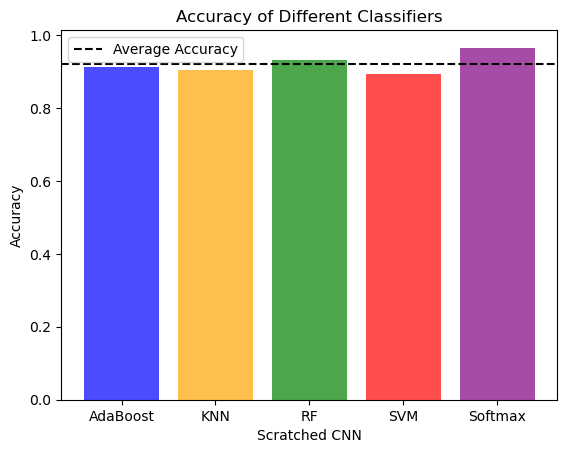

In [6]:
#CNN

import matplotlib.pyplot as plt
 
# Accuracy data
classifiers = ['AdaBoost', 'KNN', 'RF', 'SVM', 'Softmax']
accuracies = [0.9116666666666666, 0.9033333333333333, 0.93, 0.8933333333333333, 0.965]
 
# Average accuracy
average_accuracy = 0.9206666666666667 
 
# Plotting the histogram
plt.bar(classifiers, accuracies, color=['blue', 'orange', 'green', 'red', 'purple'], alpha=0.7)
 
# Plotting the average accuracy line
plt.axhline(y=average_accuracy, color='black', linestyle='--', label='Average Accuracy')
 
# Adding labels and title
plt.xlabel('Scratched CNN')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classifiers')
plt.legend()
 
# Display the plot
plt.show()


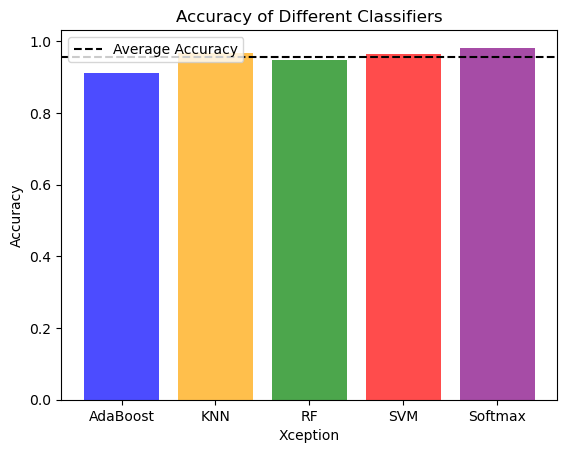

In [10]:
#Xception

import matplotlib.pyplot as plt
 
# Accuracy data
classifiers = ['AdaBoost', 'KNN', 'RF', 'SVM', 'Softmax']
accuracies = [0.91, 0.9683333333333334, 0.9483333333333334, 0.965, 0.9816666666666667]
 
# Average accuracy
average_accuracy = 0.9546666666666667  
 
# Plotting the histogram
plt.bar(classifiers, accuracies, color=['blue', 'orange', 'green', 'red', 'purple'], alpha=0.7)
 
# Plotting the average accuracy line
plt.axhline(y=average_accuracy, color='black', linestyle='--', label='Average Accuracy')
 
# Adding labels and title
plt.xlabel('Xception')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classifiers')
plt.legend()
 
# Display the plot
plt.show()


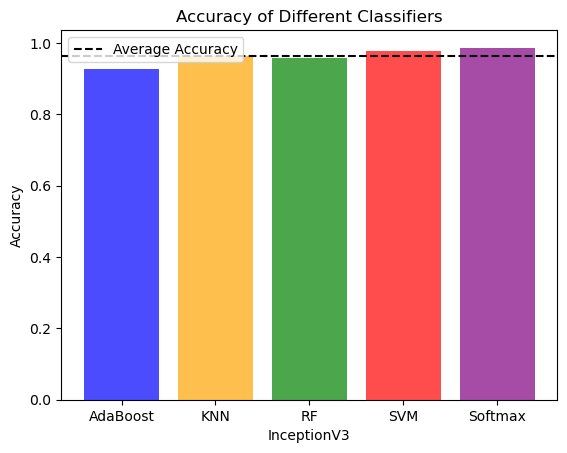

In [9]:
#InceptionV3

import matplotlib.pyplot as plt
 
# Accuracy data
classifiers = ['AdaBoost', 'KNN', 'RF', 'SVM', 'Softmax']
accuracies = [0.9283333333333333, 0.9633333333333334, 0.9583333333333334, 0.9766666666666667, 0.9866666666666667]
 
# Average accuracy
average_accuracy = 0.9626666666666667 
 
# Plotting the histogram
plt.bar(classifiers, accuracies, color=['blue', 'orange', 'green', 'red', 'purple'], alpha=0.7)
 
# Plotting the average accuracy line
plt.axhline(y=average_accuracy, color='black', linestyle='--', label='Average Accuracy')
 
# Adding labels and title
plt.xlabel('InceptionV3')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classifiers')
plt.legend()
 
# Display the plot
plt.show()

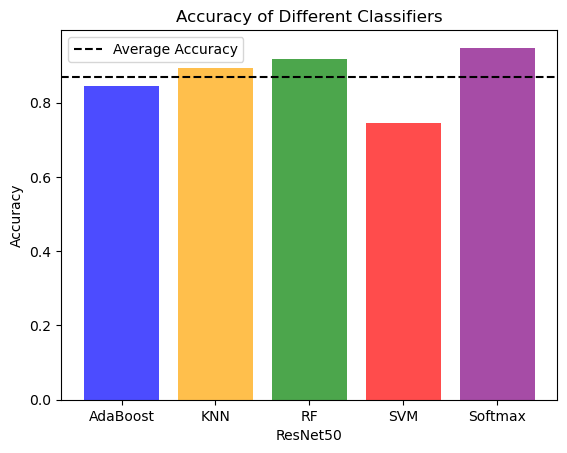

In [11]:
#ResNet50


import matplotlib.pyplot as plt
 
# Accuracy data
classifiers = ['AdaBoost', 'KNN', 'RF', 'SVM', 'Softmax']
accuracies = [0.845, 0.895, 0.9166666666666666, 0.7466666666666667, 0.9483333333333334]
 
# Average accuracy
average_accuracy = 0.8703333333333333
 
# Plotting the histogram
plt.bar(classifiers, accuracies, color=['blue', 'orange', 'green', 'red', 'purple'], alpha=0.7)
 
# Plotting the average accuracy line
plt.axhline(y=average_accuracy, color='black', linestyle='--', label='Average Accuracy')
 
# Adding labels and title
plt.xlabel('ResNet50')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classifiers')
plt.legend()
 
# Display the plot
plt.show()

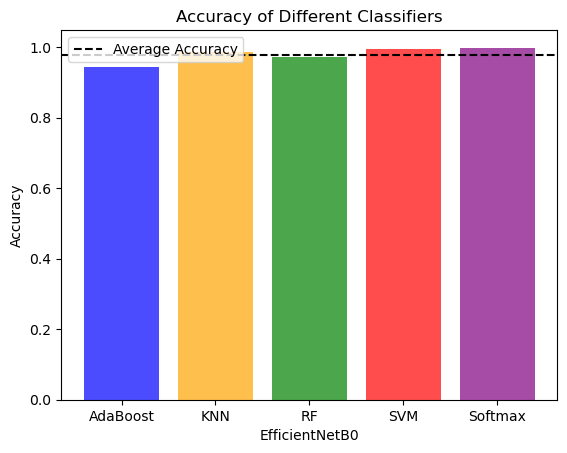

In [13]:
#EfficientNetB0


import matplotlib.pyplot as plt
 
# Accuracy data
classifiers = ['AdaBoost', 'KNN', 'RF', 'SVM', 'Softmax']
accuracies = [0.9433333333333334, 0.985, 0.9716666666666667, 0.995, 0.9983333333333333]
 
# Average accuracy
average_accuracy = 0.9786666666666667
 
# Plotting the histogram
plt.bar(classifiers, accuracies, color=['blue', 'orange', 'green', 'red', 'purple'], alpha=0.7)
 
# Plotting the average accuracy line
plt.axhline(y=average_accuracy, color='black', linestyle='--', label='Average Accuracy')
 
# Adding labels and title
plt.xlabel('EfficientNetB0')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classifiers')
plt.legend()
 
# Display the plot
plt.show()

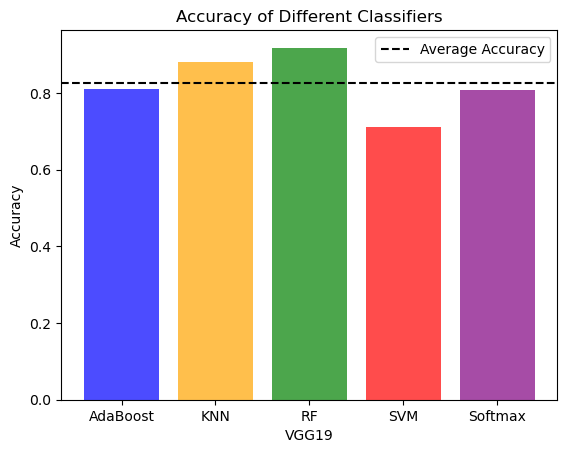

In [14]:
#VGG19


import matplotlib.pyplot as plt
 
# Accuracy data
classifiers = ['AdaBoost', 'KNN', 'RF', 'SVM', 'Softmax']
accuracies = [0.8116666666666666, 0.88, 0.9183333333333333, 0.7116666666666667, 0.8083333333333333]
 
# Average accuracy
average_accuracy = 0.826
 
# Plotting the histogram
plt.bar(classifiers, accuracies, color=['blue', 'orange', 'green', 'red', 'purple'], alpha=0.7)
 
# Plotting the average accuracy line
plt.axhline(y=average_accuracy, color='black', linestyle='--', label='Average Accuracy')
 
# Adding labels and title
plt.xlabel('VGG19')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classifiers')
plt.legend()
 
# Display the plot
plt.show()

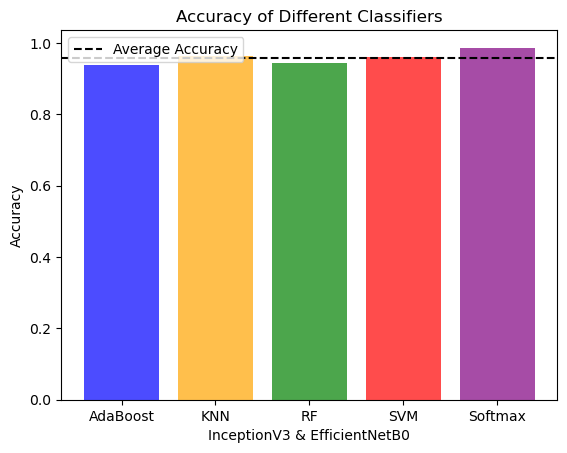

In [15]:
#InceptionV3 + EfficientNetB0


import matplotlib.pyplot as plt
 
# Accuracy data
classifiers = ['AdaBoost', 'KNN', 'RF', 'SVM', 'Softmax']
accuracies = [0.9383333333333334, 0.9633333333333334, 0.945, 0.96, 0.9866666666666667]
 
# Average accuracy
average_accuracy = 0.9586666666666666
 
# Plotting the histogram
plt.bar(classifiers, accuracies, color=['blue', 'orange', 'green', 'red', 'purple'], alpha=0.7)
 
# Plotting the average accuracy line
plt.axhline(y=average_accuracy, color='black', linestyle='--', label='Average Accuracy')
 
# Adding labels and title
plt.xlabel('InceptionV3 & EfficientNetB0')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classifiers')
plt.legend()
 
# Display the plot
plt.show()

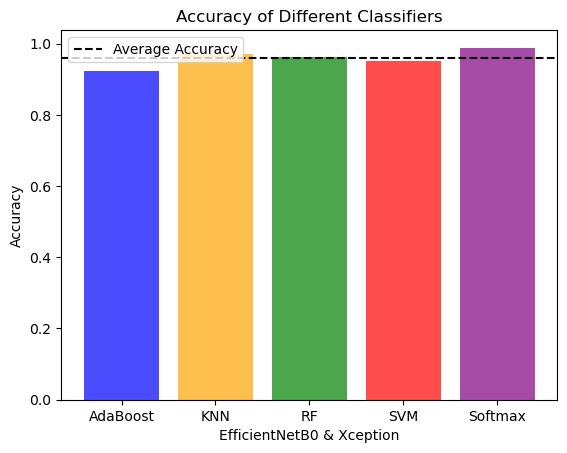

In [16]:
#EfficientNetB0 + Xception


import matplotlib.pyplot as plt
 
# Accuracy data
classifiers = ['AdaBoost', 'KNN', 'RF', 'SVM', 'Softmax']
accuracies = [0.9233333333333333, 0.97, 0.9633333333333334, 0.95, 0.9883333333333333]
 
# Average accuracy
average_accuracy = 0.959 
 
# Plotting the histogram
plt.bar(classifiers, accuracies, color=['blue', 'orange', 'green', 'red', 'purple'], alpha=0.7)
 
# Plotting the average accuracy line
plt.axhline(y=average_accuracy, color='black', linestyle='--', label='Average Accuracy')
 
# Adding labels and title
plt.xlabel('EfficientNetB0 & Xception')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classifiers')
plt.legend()
 
# Display the plot
plt.show()

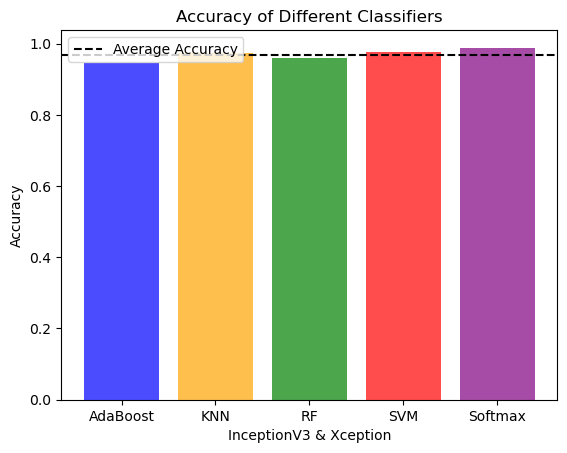

In [17]:
#InceptionV3 + Xception


import matplotlib.pyplot as plt
 
# Accuracy data
classifiers = ['AdaBoost', 'KNN', 'RF', 'SVM', 'Softmax']
accuracies = [0.9466666666666667, 0.9733333333333334, 0.96, 0.975, 0.9883333333333333]
 
# Average accuracy
average_accuracy = 0.9686666666666668 
 
# Plotting the histogram
plt.bar(classifiers, accuracies, color=['blue', 'orange', 'green', 'red', 'purple'], alpha=0.7)
 
# Plotting the average accuracy line
plt.axhline(y=average_accuracy, color='black', linestyle='--', label='Average Accuracy')
 
# Adding labels and title
plt.xlabel('InceptionV3 & Xception')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classifiers')
plt.legend()
 
# Display the plot
plt.show()

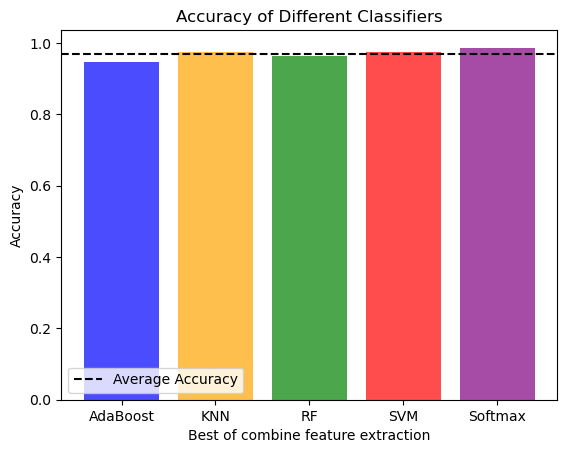

In [19]:
#InceptionV3 + EfficientNetB0 + EfficientNetB0 + Xception


import matplotlib.pyplot as plt
 
# Accuracy data
classifiers = ['AdaBoost', 'KNN', 'RF', 'SVM', 'Softmax']
accuracies = [0.9466666666666667, 0.9733333333333334, 0.9633333333333334, 0.975, 0.9866666666666667]
 
# Average accuracy
average_accuracy = 0.969
 
# Plotting the histogram
plt.bar(classifiers, accuracies, color=['blue', 'orange', 'green', 'red', 'purple'], alpha=0.7)
 
# Plotting the average accuracy line
plt.axhline(y=average_accuracy, color='black', linestyle='--', label='Average Accuracy')
 
# Adding labels and title
plt.xlabel('Best of combine feature extraction')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classifiers')
plt.legend()
 
# Display the plot
plt.show()

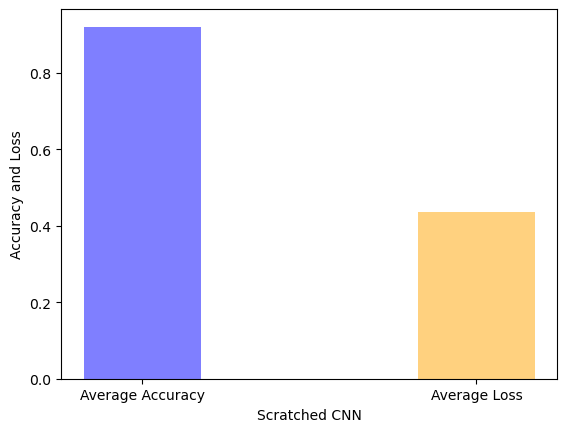

In [20]:
#Loss of Scratched CNN
import matplotlib.pyplot as plt
 
# Accuracy data
classifiers = ['Average Accuracy', 'Average Loss']
accuracies = [0.9206666666666667 , 0.43547574973628816]
 
# Plotting the histogram with narrower bars and reduced gap
plt.bar(classifiers, accuracies, color=['blue', 'orange'], alpha=0.5, width=0.35)
 
# Adding labels and title
plt.xlabel('Scratched CNN')
plt.ylabel('Accuracy and Loss')
 
# Display the plot
plt.show()

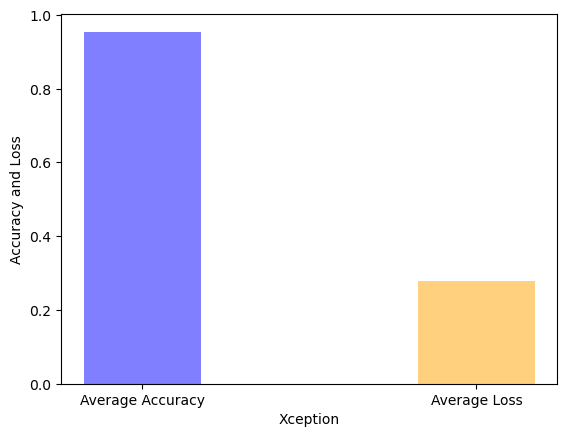

In [21]:
#Loss of Xception
import matplotlib.pyplot as plt
 
# Accuracy data
classifiers = ['Average Accuracy', 'Average Loss']
accuracies = [0.9546666666666667  , 0.278561994576939]
 
# Plotting the histogram with narrower bars and reduced gap
plt.bar(classifiers, accuracies, color=['blue', 'orange'], alpha=0.5, width=0.35)
 
# Adding labels and title
plt.xlabel('Xception')
plt.ylabel('Accuracy and Loss')
 
# Display the plot
plt.show()

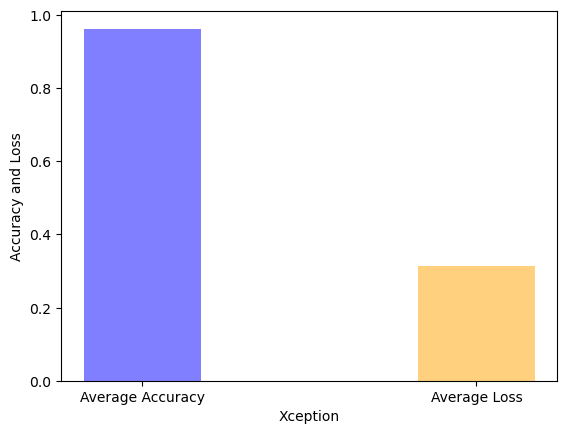

In [22]:
#Loss of InceptionV3
import matplotlib.pyplot as plt
 
# Accuracy data
classifiers = ['Average Accuracy', 'Average Loss']
accuracies = [0.9626666666666667  , 0.3141355671377093]
 
# Plotting the histogram with narrower bars and reduced gap
plt.bar(classifiers, accuracies, color=['blue', 'orange'], alpha=0.5, width=0.35)
 
# Adding labels and title
plt.xlabel('InceptionV3')
plt.ylabel('Accuracy and Loss')
 
# Display the plot
plt.show()

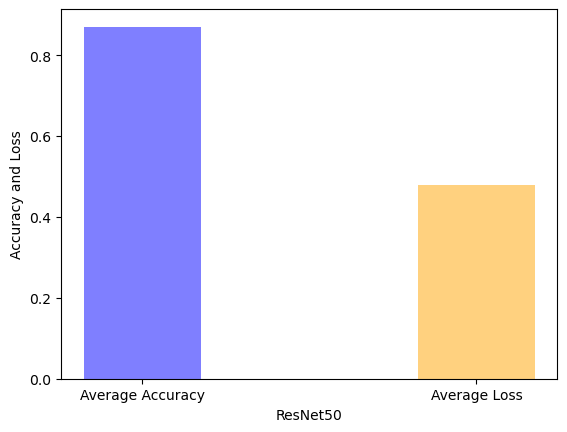

In [23]:
#Loss of ResNet50
import matplotlib.pyplot as plt
 
# Accuracy data
classifiers = ['Average Accuracy', 'Average Loss']
accuracies = [0.8703333333333333  , 0.47863718179340226]
 
# Plotting the histogram with narrower bars and reduced gap
plt.bar(classifiers, accuracies, color=['blue', 'orange'], alpha=0.5, width=0.35)
 
# Adding labels and title
plt.xlabel('ResNet50')
plt.ylabel('Accuracy and Loss')
 
# Display the plot
plt.show()

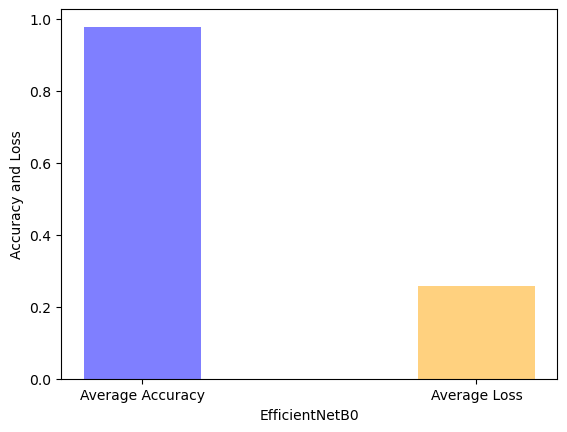

In [24]:
#Loss of EfficientNetB0
import matplotlib.pyplot as plt
 
# Accuracy data
classifiers = ['Average Accuracy', 'Average Loss']
accuracies = [0.9786666666666667  , 0.25709034037292755]
 
# Plotting the histogram with narrower bars and reduced gap
plt.bar(classifiers, accuracies, color=['blue', 'orange'], alpha=0.5, width=0.35)
 
# Adding labels and title
plt.xlabel('EfficientNetB0')
plt.ylabel('Accuracy and Loss')
 
# Display the plot
plt.show()

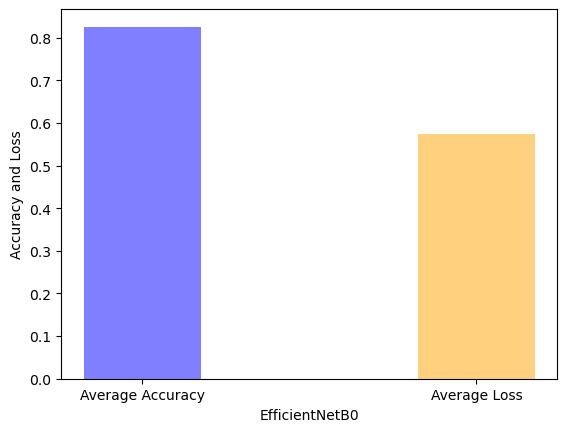

In [25]:
#Loss of VGG19
import matplotlib.pyplot as plt
 
# Accuracy data
classifiers = ['Average Accuracy', 'Average Loss']
accuracies = [0.826  , 0.5734422476639008]
 
# Plotting the histogram with narrower bars and reduced gap
plt.bar(classifiers, accuracies, color=['blue', 'orange'], alpha=0.5, width=0.35)
 
# Adding labels and title
plt.xlabel('EfficientNetB0')
plt.ylabel('Accuracy and Loss')
 
# Display the plot
plt.show()

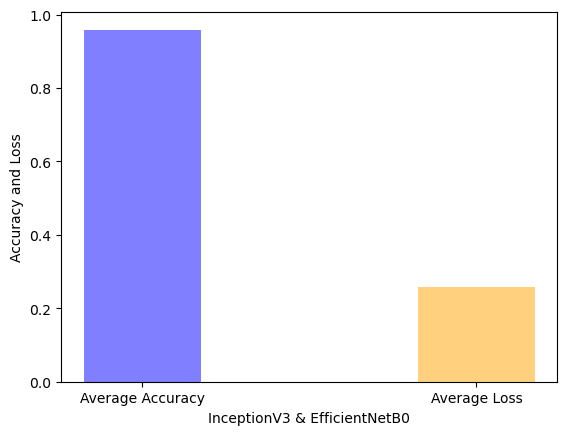

In [26]:
#Loss of InceptionV3 + EfficientNetB0
import matplotlib.pyplot as plt
 
# Accuracy data
classifiers = ['Average Accuracy', 'Average Loss']
accuracies = [0.9586666666666666  , 0.2584042346802601]
 
# Plotting the histogram with narrower bars and reduced gap
plt.bar(classifiers, accuracies, color=['blue', 'orange'], alpha=0.5, width=0.35)
 
# Adding labels and title
plt.xlabel('InceptionV3 & EfficientNetB0')
plt.ylabel('Accuracy and Loss')
 
# Display the plot
plt.show()

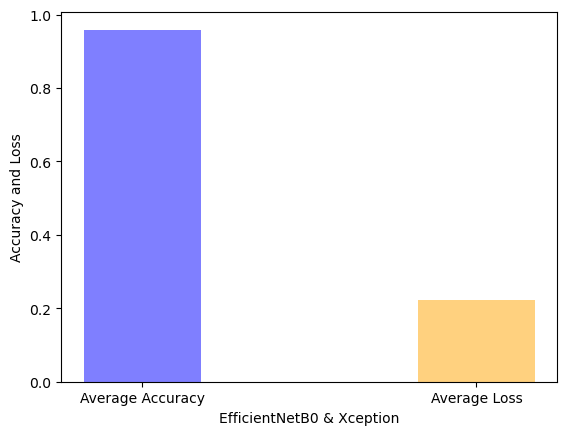

In [27]:
#Loss of EfficientNetB0 + Xception
import matplotlib.pyplot as plt
 
# Accuracy data
classifiers = ['Average Accuracy', 'Average Loss']
accuracies = [0.959   , 0.2235120442216189]
 
# Plotting the histogram with narrower bars and reduced gap
plt.bar(classifiers, accuracies, color=['blue', 'orange'], alpha=0.5, width=0.35)
 
# Adding labels and title
plt.xlabel('EfficientNetB0 & Xception')
plt.ylabel('Accuracy and Loss')
 
# Display the plot
plt.show()

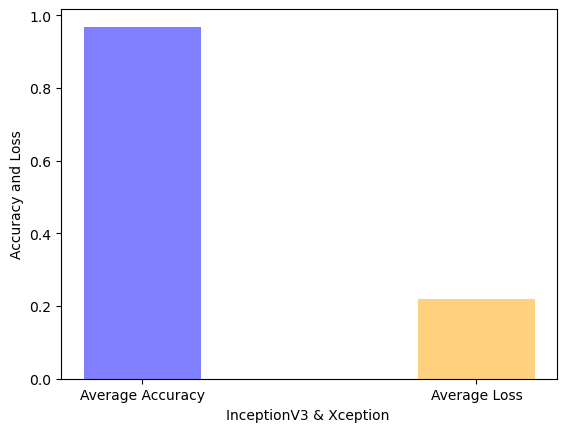

In [28]:
#Loss of InceptionV3 + Xception 
import matplotlib.pyplot as plt
 
# Accuracy data
classifiers = ['Average Accuracy', 'Average Loss']
accuracies = [0.9686666666666668   , 0.219364448078531731]
 
# Plotting the histogram with narrower bars and reduced gap
plt.bar(classifiers, accuracies, color=['blue', 'orange'], alpha=0.5, width=0.35)
 
# Adding labels and title
plt.xlabel('InceptionV3 & Xception ')
plt.ylabel('Accuracy and Loss')
 
# Display the plot
plt.show()

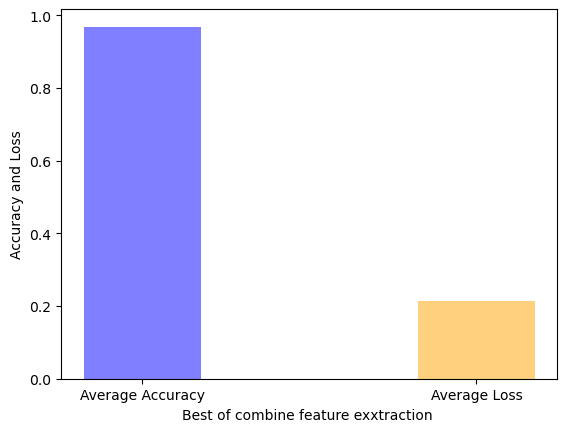

In [29]:
#Loss of InceptionV3 + EfficientNetB0 + EfficientNetB0 + Xception
import matplotlib.pyplot as plt
 
# Accuracy data
classifiers = ['Average Accuracy', 'Average Loss']
accuracies = [0.969   , 0.21529668262002932]
 
# Plotting the histogram with narrower bars and reduced gap
plt.bar(classifiers, accuracies, color=['blue', 'orange'], alpha=0.5, width=0.35)
 
# Adding labels and title
plt.xlabel('Best of combine feature exxtraction ')
plt.ylabel('Accuracy and Loss')
 
# Display the plot
plt.show()